In [11]:
!pip install LightPipes[pyfftw]
# Se você não tiver o LightPipes no PC/colab tire o "# da linha anterior"
from LightPipes import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


# Valor de L dos pseudos modos?

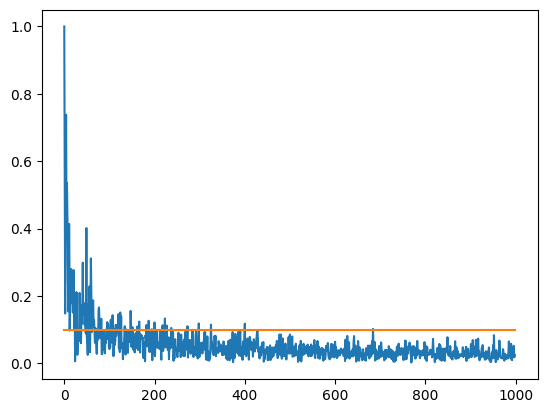

In [31]:
L = 1000     # numero de L de pseudos modos
Doc_hd = [] # Variavel para guardas os dados obtidos
for j in range(1,L): # loop para determinar o valor de L.
  Doc = []
  i = 0
  # Condição para que gere j Docs
  while i<j:
    # Calculando a diferença das fases
    # cada fase foi gerada~a parti de um distribuição uniforme aleatoria
    # entre 0 a 2pi
    phase = np.random.rand(1)*2*np.pi -  np.random.rand(1)*2*np.pi
    DOC =  np.exp( 1j*phase ) # Eq.?? do artigo
    Doc.append(DOC) # guardando os dados obtidos
    i += 1

  # Somando todos os doc e normalizando
  Doc = abs(sum(Doc))/j
  # guardando os dados obtidos
  Doc_hd.append(Doc)

# Visualizando os resultados
plt.plot(Doc_hd,"-")
plt.plot(np.ones(L)*0.1)
plt.show()

Visualizando na escala logaritma

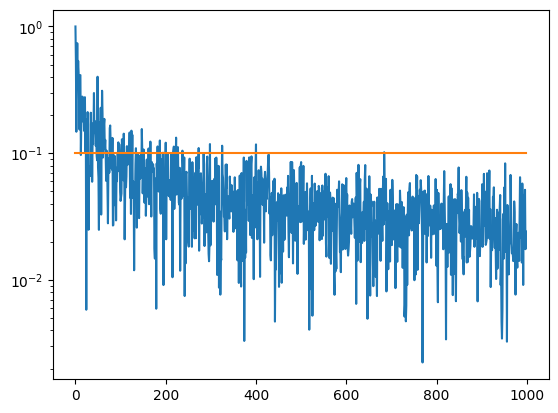

In [32]:
# Visualizando os resultados
plt.plot(Doc_hd,"-")
plt.plot(np.ones(L)*0.1)
plt.yscale("log")
plt.show()

# Valor de M e N dos pseudos modos?

Para realizar a analise vamos primeiro aprender a deteminar o doc do campo.

Definimos novamente as configuções ininicais

In [35]:
L  = 100;       # Número da soma incorente
N  = 2**7;      # Tamanho da imagem
dx = 10*um;     # Tamanho do pixel

sigma = .2*mm;  # Cintura do feixe
delta = sigma/2 # Comprimento de coerência

x = np.arange(-N/2,N/2,1)*dx;
[xx,yy] = np.meshgrid(x,x);

Agora iremos criar o campo.

Considerando que M=N, no codigo vou chamar de constate L_nm=15.

Será criando tambem a variaveil pseudos_modos para armazenar todos os pseudos modos gerados e a intensidade "intensidade_pm".

v_{n,m} é a varivel v_{n,m} descrita no artigo e, Eq.().

In [36]:
L_nm = 15
pseudos_modos = np.exp(1j*np.zeros((N,N,L)))
intensidade_pm = np.zeros((N,N))# intensidade dos pseudos modos

v_nm = np.linspace(-1,1,L_nm)*np.sqrt(2)/(np.pi*delta )
for ii in range(0,L):
    u = np.zeros_like(xx);
    for j in v_nm: # v_n
        for i in v_nm:# v_m
            p_nm = np.exp( - ( j**2 + i**2 )*( np.pi*delta )**2)
            H    = np.exp(- ( xx**2 + yy**2 )/(2*sigma )**2
                    + 2j*np.pi*( xx*j + yy*i ))
            random_phase = np.exp(- 2j*np.pi*np.random.randn(1) )

            campo = (np.sqrt( 2*np.pi )*delta )*p_nm*H*random_phase
            u = u + campo
    u = u/u.max()
    pseudos_modos[:,:,ii] = u;
    intensidade_pm += abs(u**2);
#-------------------------------------

Com todos os termo gerados iremos determianr o CSD normalizada usando a EQ.().

Na CSD normalizada temos a posição  
    
    r_1= (x_1,y_1) e r_2= (x_2,y_2).

Camos terminar a CSD normalizada cosiderando :

    r_1 = (x_1,0) e r_2= (0,0).

<ipython-input-38-f4b5098e1d24>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu[ii] = np.sum(np.conj(pseudos_modos[ii,jj,:])*pseudos_modos[index[0],index[1],:])/np.sqrt(intensidade_pm[ii,jj]*intensidade_pm[index[0],index[1]])


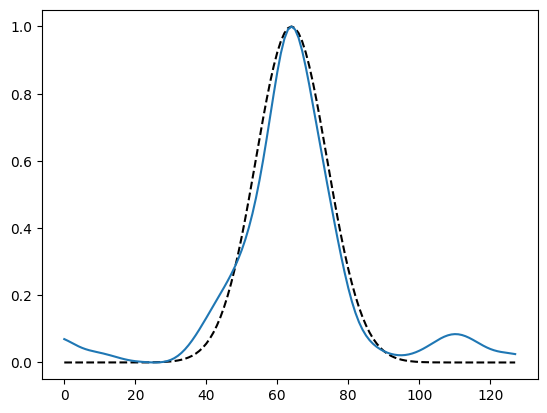

In [38]:
ref = [0,0] #r_2
index = np.where((xx==ref[0])*(yy==ref[1])==True)

# variável para armazenar  CSD normalizada
mu = np.zeros_like(pseudos_modos[:,0,0])
for ii in range(0,N):
    jj = index[1]
    mu[ii] = np.sum(np.conj(pseudos_modos[ii,jj,:])*pseudos_modos[index[0],index[1],:])/np.sqrt(intensidade_pm[ii,jj]*intensidade_pm[index[0],index[1]])

 # Valor teorico Eq.()
mu_x_000 = np.exp( -x**2/(2*delta**2) )

# visualizando os resultados
plt.plot(mu_x_000,"k--")
plt.plot( abs(mu/mu.max())**2 )
plt.show()

Agora que sabemos como criar iremos analisar para diferente valores da soma corente

In [64]:
L  = 200;       # Número da soma incorente
N  = 2**7;      # Tamanho da imagem
dx = 10*um;     # Tamanho do pixel
sigma = .1*mm;  # Cintura do feixe

x = np.arange(-N/2,N/2,1)*dx;
[xx,yy] = np.meshgrid(x,x);

<ipython-input-65-7b53c456631f>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu[ii] = np.sum(np.conj(pseudos_modos[ii,jj,:])*pseudos_modos[index[0],index[1],:])/np.sqrt(intensidade_pm[ii,jj]*intensidade_pm[index[0],index[1]])


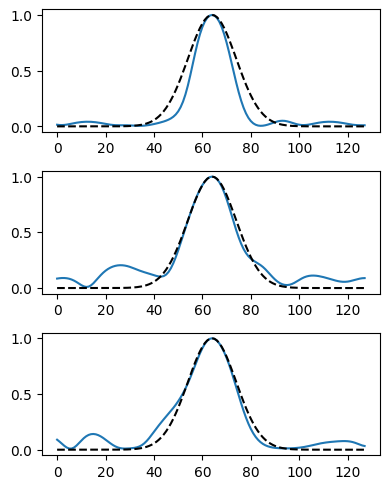

In [65]:
delta = sigma   # Comprimento de coerencia

A = []
# loop para variar o Número da soma coerente
for L_nm in [10,15,25]:
    # Cada pseudo modo
    pseudos_modos = np.exp(1j*np.zeros((N,N,L)))
    # intensidade dos pseudos modos
    intensidade_pm = np.zeros((N,N))

    v_nm = np.linspace(-1,1,L_nm)*np.sqrt(2)/(np.pi*delta )
    for ii in range(0,L):
        u = np.zeros_like(xx);
        for j in v_nm: # v_n
            for i in v_nm:# v_m
                p_nm = np.exp( - ( j**2 + i**2 )*( np.pi*delta )**2)
                H    = np.exp(- ( xx**2 + yy**2 )/(2*sigma )**2
                        + 2j*np.pi*( xx*j + yy*i ))
                random_phase = np.exp(- 2j*np.pi*np.random.randn(1) )

                campo = (np.sqrt( 2*np.pi )*delta )*p_nm*H*random_phase
                u = u + campo
        u = u/u.max()
        pseudos_modos[:,:,ii] = u;
        intensidade_pm += abs(u**2);

    ref = [0,0] #r_2
    index = np.where((xx==ref[0])*(yy==ref[1])==True)

    # variável para armazenar  CSD normalizada
    mu = np.zeros_like(pseudos_modos[:,0,0])
    for ii in range(0,N):
        jj = index[1]
        mu[ii] = np.sum(np.conj(pseudos_modos[ii,jj,:])*pseudos_modos[index[0],index[1],:])/np.sqrt(intensidade_pm[ii,jj]*intensidade_pm[index[0],index[1]])

    # salvando a CSD normalizada
    A.append( abs(mu/mu.max())**2 )
#-------------------------------------

# Visualização
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 5))
mu_x_000 = np.exp( -x**2/(2*delta**2) )

axes[0].plot( A[0] );axes[0].plot(mu_x_000,"k--")
axes[1].plot( A[1] );axes[1].plot(mu_x_000,"k--")
axes[2].plot( A[2] );axes[2].plot(mu_x_000,"k--")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-66-6ee306db33f3>:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mu[ii] = np.sum(np.conj(pseudos_modos[ii,jj,:])*pseudos_modos[index[0],index[1],:])/np.sqrt(intensidade_pm[ii,jj]*intensidade_pm[index[0],index[1]])


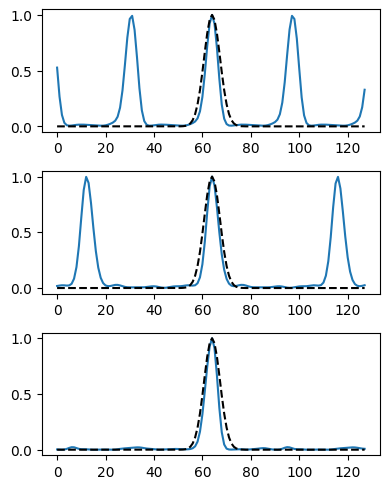

In [66]:
delta = sigma/3   # Comprimento de coerencia

A = []
# loop para variar o Número da soma coerente
for L_nm in [10,15,25]:
    # Cada pseudo modo
    pseudos_modos = np.exp(1j*np.zeros((N,N,L)))
    # intensidade dos pseudos modos
    intensidade_pm = np.zeros((N,N))

    v_nm = np.linspace(-1,1,L_nm)*np.sqrt(2)/(np.pi*delta )
    for ii in range(0,L):
        u = np.zeros_like(xx);
        for j in v_nm: # v_n
            for i in v_nm:# v_m
                p_nm = np.exp( - ( j**2 + i**2 )*( np.pi*delta )**2)
                H    = np.exp(- ( xx**2 + yy**2 )/(2*sigma )**2
                        + 2j*np.pi*( xx*j + yy*i ))
                random_phase = np.exp(- 2j*np.pi*np.random.randn(1) )

                campo = (np.sqrt( 2*np.pi )*delta )*p_nm*H*random_phase
                u = u + campo
        u = u/u.max()
        pseudos_modos[:,:,ii] = u;
        intensidade_pm += abs(u**2);

    ref = [0,0] #r_2
    index = np.where((xx==ref[0])*(yy==ref[1])==True)

    # variável para armazenar  CSD normalizada
    mu = np.zeros_like(pseudos_modos[:,0,0])
    for ii in range(0,N):
        jj = index[1]
        mu[ii] = np.sum(np.conj(pseudos_modos[ii,jj,:])*pseudos_modos[index[0],index[1],:])/np.sqrt(intensidade_pm[ii,jj]*intensidade_pm[index[0],index[1]])

    # salvando a CSD normalizada
    A.append( abs(mu/mu.max())**2 )
#-------------------------------------

# Visualização
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 5))
mu_x_000 = np.exp( -x**2/(2*delta**2) )

axes[0].plot( A[0] );axes[0].plot(mu_x_000,"k--")
axes[1].plot( A[1] );axes[1].plot(mu_x_000,"k--")
axes[2].plot( A[2] );axes[2].plot(mu_x_000,"k--")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()